# Subunit A workflow

This notebook was modified according to Jupyter Notebook. The original version was developed initially for Google Colab.

In [1]:
import os
os.environ['PYTHONDWRITEBYTECODE'] = '0'

## 0. Install and import packages

In [5]:
#@title 0. Install and import packages

# NCBI Search
from scripts.ncbi_search import search_ncbi_proteins, fetch_single_protein_info, fetch_all_protein_data
# BLAST
from scripts.blast import get_blast_results, convert_blast_xml_to_pd, export_blast_results_to_fasta
# MSA
from scripts.msa import perform_msa
from pymsaviz import MsaViz
import xml.etree.ElementTree as ET

# Visualize tables dynamically
from itables import init_notebook_mode, show
# Initialize itables for interactive display
init_notebook_mode(all_interactive=True)

## 1. Search protein on NCBI

In [12]:
#@title 1. Search protein on NCBI

# ------------------------
# Set parameters
# ------------------------
query = "Bacillus subtilis[Organism] AND dipicolinate synthase AND subunit A" #@param {type: "string"}

# Search NCBI
protein_results, num_batches = search_ncbi_proteins(query)

# Get all IDs
root = ET.fromstring(protein_results)
id_list = [id_element.text for id_element in root.findall('.//Id')]

# Get DataFrame for a specific batch range
start_batch = 1
end_batch = 3

# Only fetch a few batches to start with
df = fetch_all_protein_data(id_list, start_batch, min(end_batch, num_batches))

if not df.empty:
    print(f"Retrieved {len(df)} protein records")
    # Print df dynamically
    print(df.loc[0:9,['definition', 'primary_accession', 'organism']])
    #df.to_csv("files/protein_data.csv", index=False)
else:
    print("No data retrieved")

Total entries found: 1120
Total available pages: 45
(25 entries per page)
Fetching batch 1 of 3...
Fetching batch 2 of 3...
Fetching batch 3 of 3...
Retrieved 75 protein records
                                          definition primary_accession  \
0  dipicolinate synthase subunit B [Bacillus subt...      WP_445595577   
1  dipicolinate synthase subunit B [Bacillus subt...          YAK94659   
2  dipicolinate synthase subunit B [Bacillus subt...          XZG99397   
3  dipicolinate synthase subunit B [Bacillus subt...          XZD66895   
4  dipicolinate synthase subunit B [Bacillus subt...          XZD57528   
5  dipicolinate synthase subunit B [Bacillus subt...          XZD55884   
6  dipicolinate synthase subunit B [Bacillus subt...          XZD13210   
7  dipicolinate synthase subunit B [Bacillus subt...      WP_440620141   
8  dipicolinate synthase subunit B [Bacillus subt...          XNR31218   
9  dipicolinic acid synthetase subunit A [Bacillu...          XNR31217   

       

In [ ]:
# Get info from individual entry
protein_id = "SPY12701.1"

# Fetch single protein info
data_search = fetch_single_protein_info(protein_id, export=True)
print(f"Retrieved data for {protein_id}")

BLAST results differ between API-based and Web-based. For flexible results, we will retrieve the RID from Web-based and continue working on this script.

## 2. Get BLAST results from RID

In [ ]:
#@title 2. Get BLAST results from RID

# ------------------------
# Set parameters
# ------------------------
rid = "JC893HGR014" #@param {type: "string"}
# Get BLAST results
rid, xml_results = get_blast_results(rid=rid, export=True)

(1) BLAST job is complete, and hits are found!
=== BLAST XML RESULTS ===

Results written to JC893HGR014_results.xml


Convert BLAST XML results to DataFrame

In [15]:
df = convert_blast_xml_to_pd(xml_results=xml_results, rid=rid, export=True)

DataFrame shape: (100, 21)
DataFrame saved to JC893HGR014_results.csv


Visualize DataFrame dynamically

In [16]:
df

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


Export BLAST to FASTA file

In [18]:
# ------------------------
# Set parameters
# ------------------------
# Export BLAST results
export_blast_results_to_fasta(
    df=df, 
    rid=rid, 
    query_id=protein_id
)

BLAST results successfully exported to files/JC893HGR014_blast.fasta
Total sequences exported: 100


# Multiple Sequence Analysis

In [20]:
num_sequences = 25 #@param {type: "integer"}
alignment = perform_msa(
    df=df,
    query_id=protein_id,
    num_sequences=num_sequences
)

Prepared 24 sequences (1 Query + 23 Top Hits) for alignment.
Sequences saved to temporary file: temp_input_IXTpe6eOK7j7.fasta
Running: clustalo -i temp_input_IXTpe6eOK7j7.fasta -o temp_output_IXTpe6eOK7j7.fasta --outfmt=fasta --verbose --auto
Alignment completed successfully
Temporary files cleaned up.


Visualize MSA (PNG file)

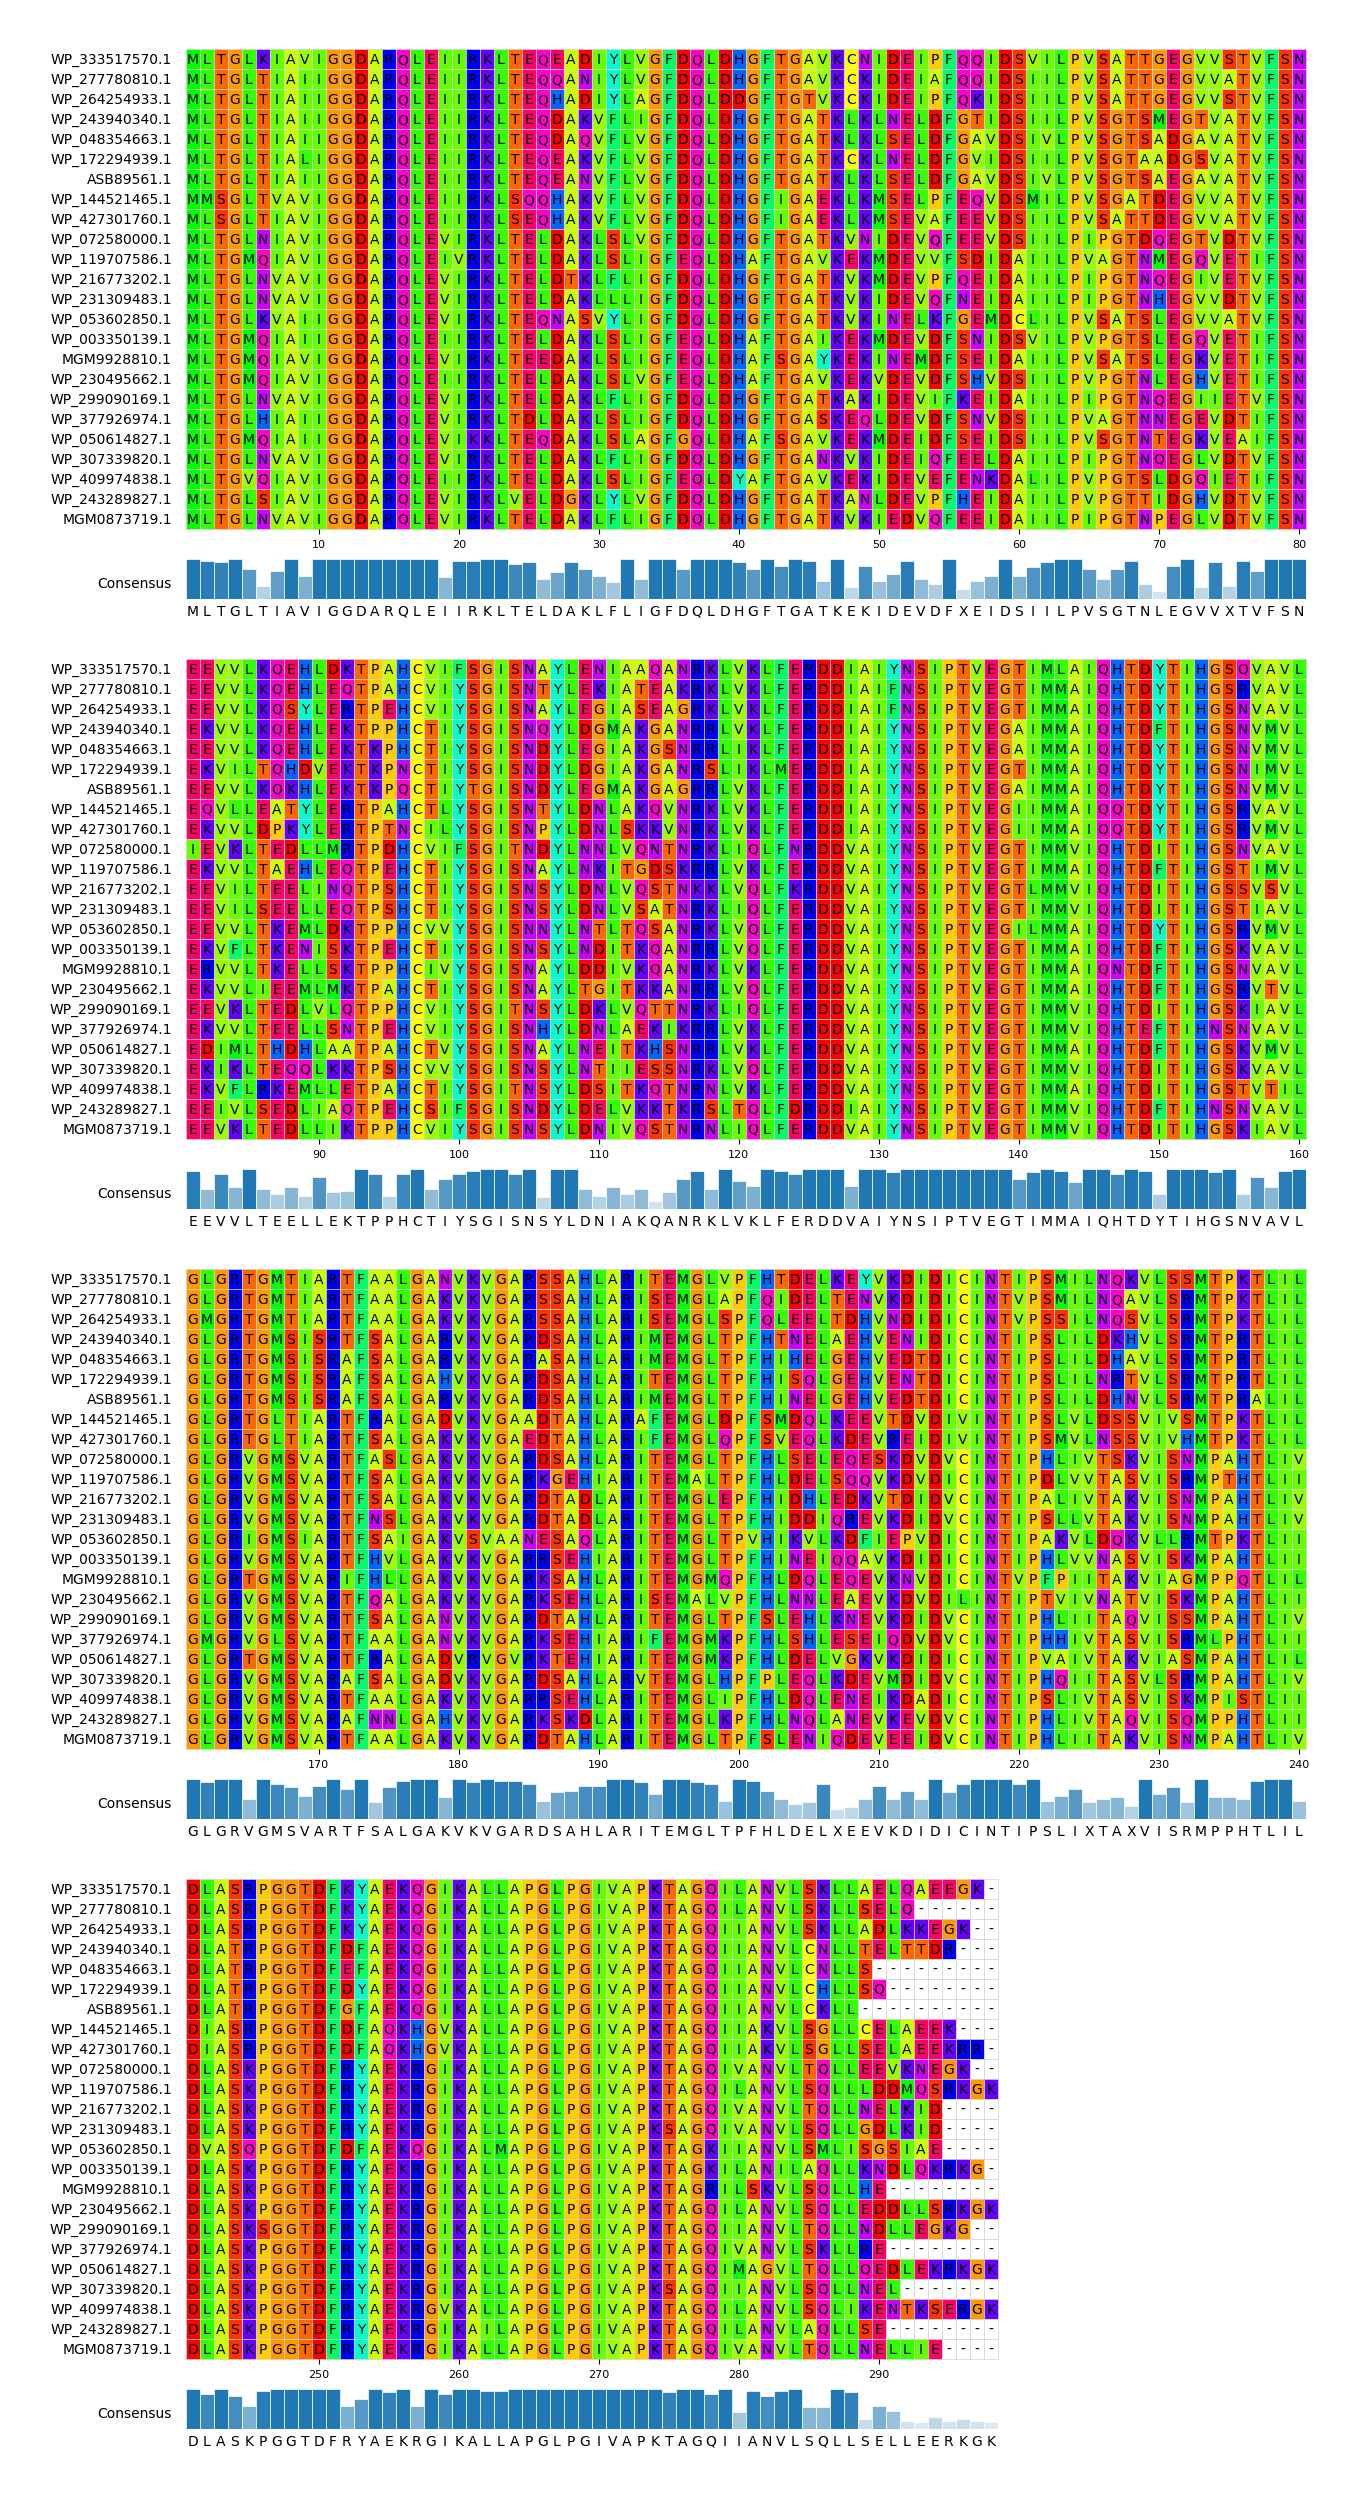

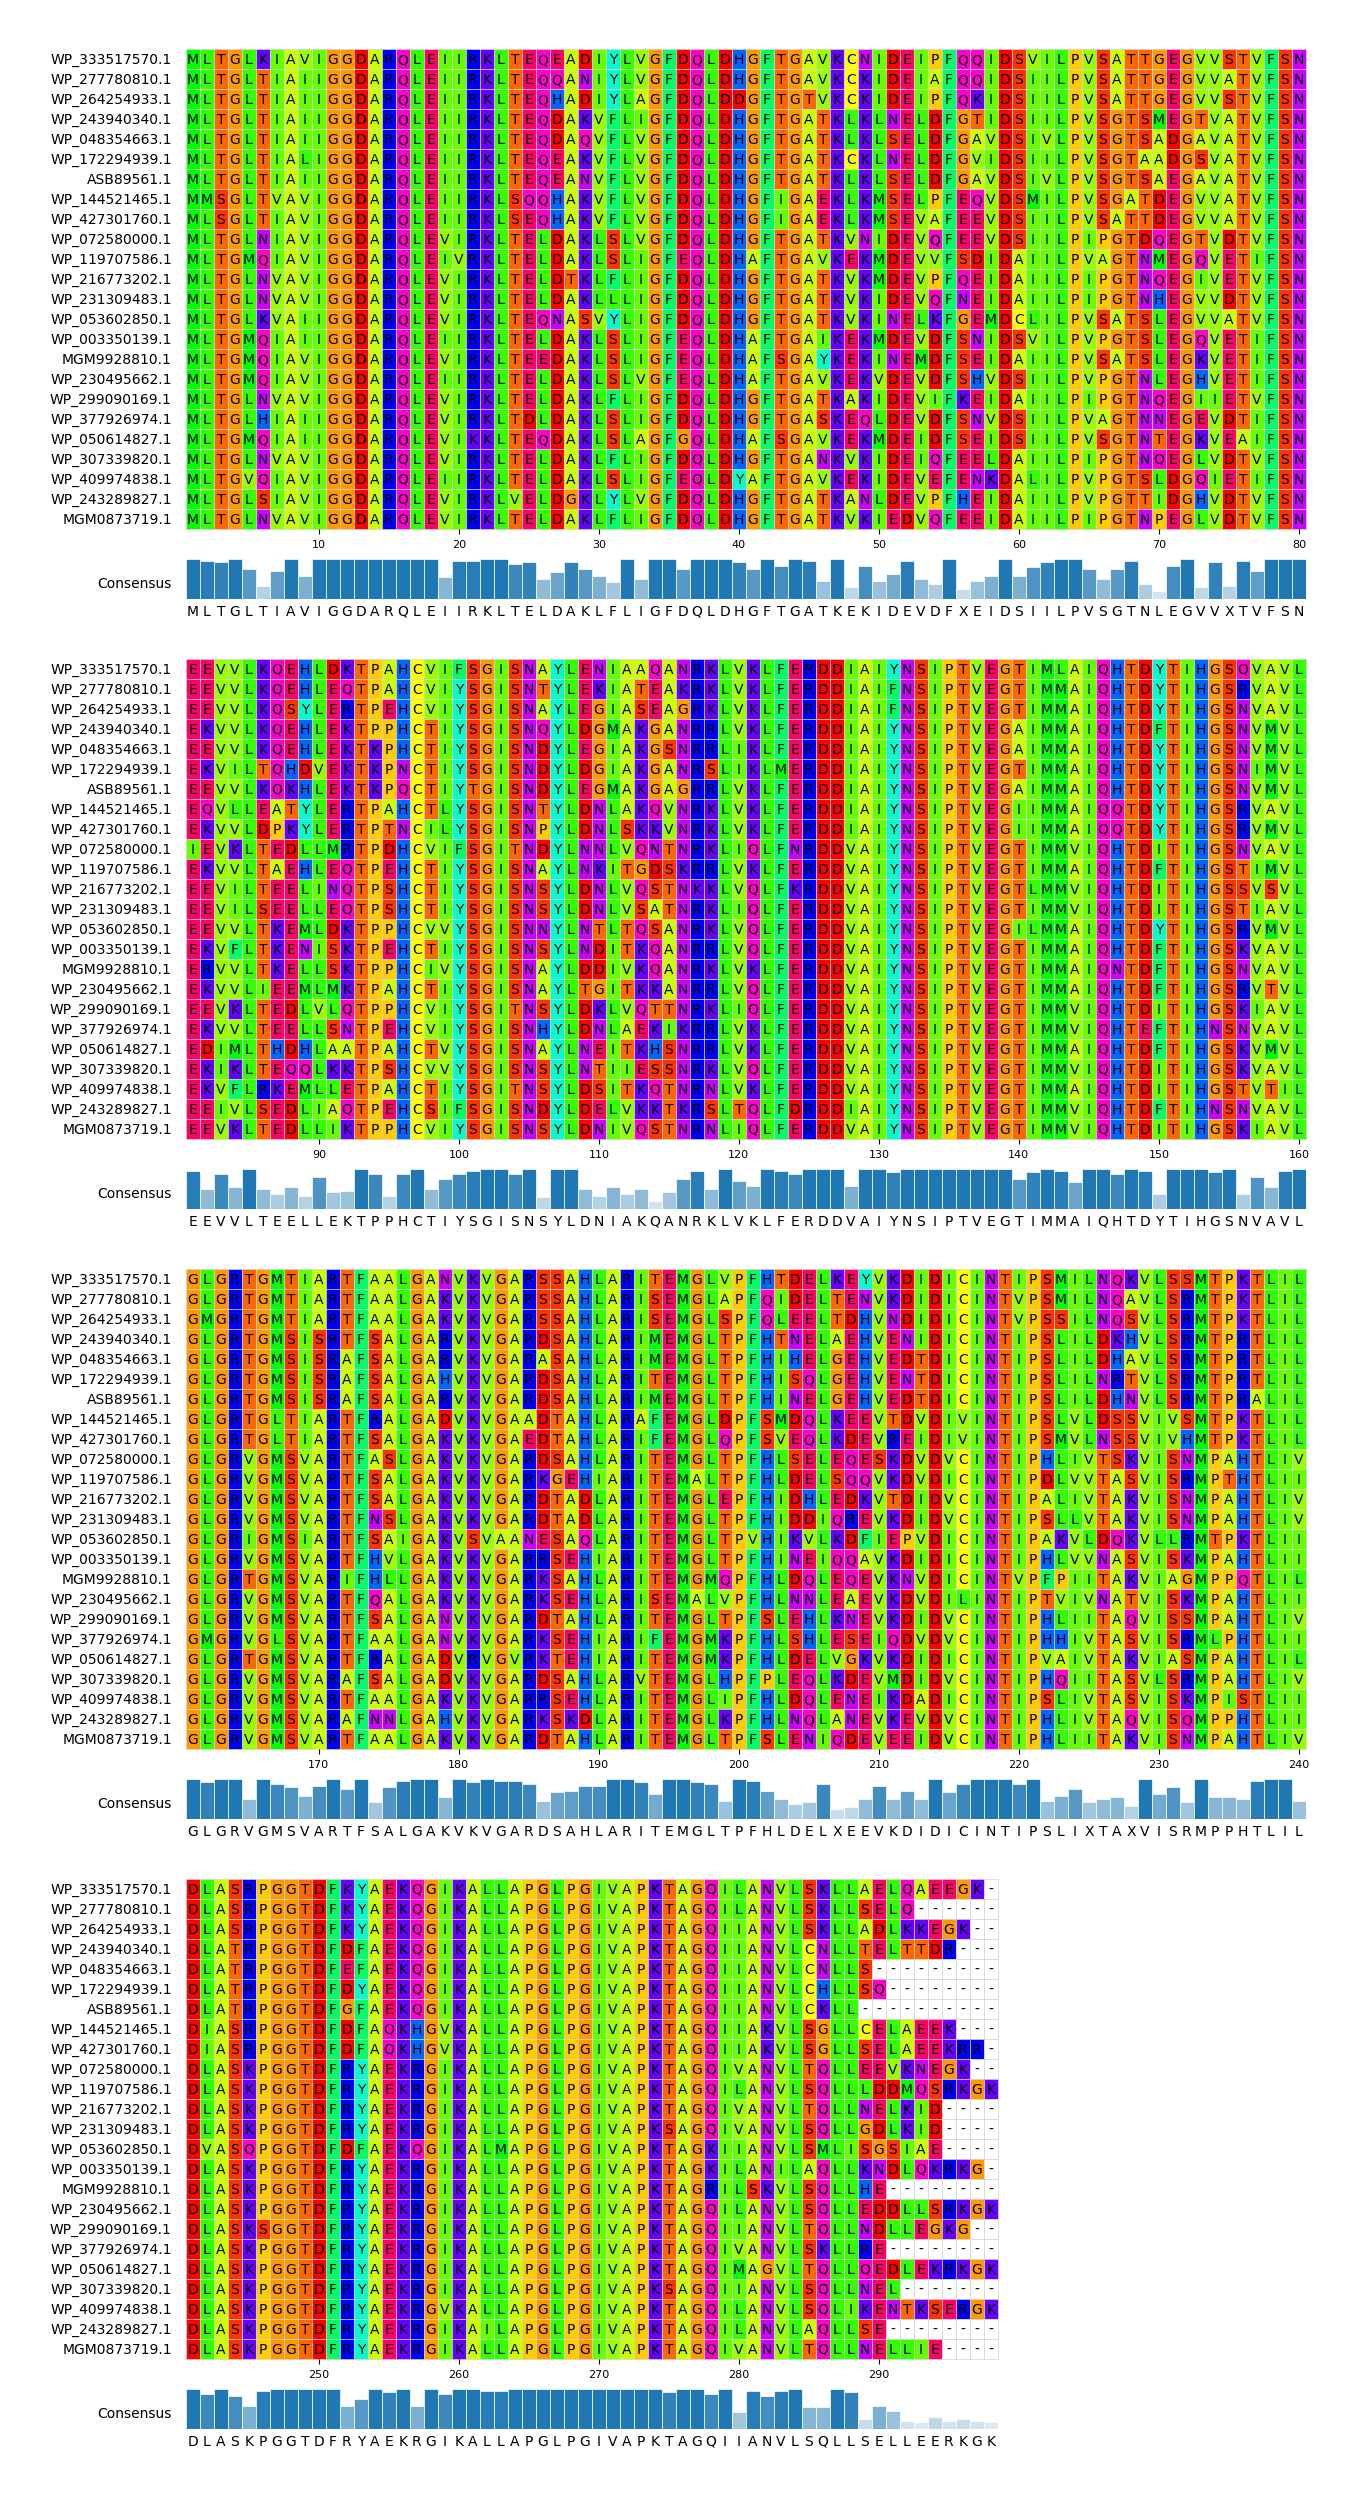

In [23]:
mv = MsaViz(alignment, color_scheme="Taylor", wrap_length=80, show_grid=True, show_consensus=True)
mv.savefig(f"files/{rid}_msa.png")
mv.plotfig()